# Linear Regression

## Table of Contents
1. [Introduction](#1-introduction)
2. [Theory & Mathematics](#2-theory--mathematics)
3. [Assumptions & Requirements](#3-assumptions--requirements)
4. [When to Use This Algorithm](#4-when-to-use-this-algorithm)
5. [Implementation from Scratch (NumPy)](#5-implementation-from-scratch-numpy)
6. [Implementation with Scikit-learn](#6-implementation-with-scikit-learn)
7. [Hyperparameter Tuning](#7-hyperparameter-tuning)
8. [Complete Hyperparameter Reference](#8-complete-hyperparameter-reference)
9. [Practical Tips & Common Pitfalls](#9-practical-tips--common-pitfalls)
10. [Real-world Example](#10-real-world-example)
11. [Comparison with Other Algorithms](#11-comparison-with-other-algorithms)
12. [References](#12-references)


---

## 1. Introduction

### What is Linear Regression?

Linear Regression is one of the simplest and most fundamental machine learning algorithms. It models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.

**Key characteristics:**
- **Supervised learning** algorithm for regression tasks
- **Parametric** model (assumes a specific functional form)
- **Simple yet powerful** for linear relationships
- **Interpretable** - you can understand exactly how predictions are made

**Historical Context:**
- Developed by Francis Galton in the late 19th century
- Originally used for studying heredity (regression toward the mean)
- Now one of the most widely used statistical techniques

**Main Use Cases:**
- Predicting continuous values (house prices, sales, temperatures)
- Understanding relationships between variables
- Feature importance analysis
- Baseline model for more complex algorithms


---

## 2. Theory & Mathematics

### Core Concept

Linear regression finds the "best fit" line through your data points. The model equation is:

**Simple Linear Regression (1 feature):**
$$y = w_0 + w_1x$$

**Multiple Linear Regression (n features):**
$$y = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n$$

Or in vector form:
$$\mathbf{y} = \mathbf{X}\mathbf{w} + b$$

Where:
- $\mathbf{y}$ = target values (what we want to predict)
- $\mathbf{X}$ = feature matrix (input data)
- $\mathbf{w}$ = weights/coefficients (slopes)
- $b$ = bias/intercept

### Cost Function

We measure how well our line fits the data using **Mean Squared Error (MSE)**:

$$J(\mathbf{w}) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \frac{1}{n}\sum_{i=1}^{n}(y_i - \mathbf{x}_i^T\mathbf{w})^2$$

Our goal: **minimize** this cost function.

### Optimization Method: Normal Equation

The optimal weights can be found analytically using the **Normal Equation**:

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

**Advantages:**
- Finds the exact solution in one step
- No hyperparameters to tune
- No iterations needed

**Disadvantages:**
- Slow for large datasets ($O(n^3)$ complexity)
- Doesn't work if $\mathbf{X}^T\mathbf{X}$ is not invertible

### Alternative: Gradient Descent

For large datasets, we can use **Gradient Descent**:

1. Start with random weights
2. Calculate gradient: $\nabla J(\mathbf{w}) = -\frac{2}{n}\mathbf{X}^T(\mathbf{y} - \mathbf{X}\mathbf{w})$
3. Update weights: $\mathbf{w} := \mathbf{w} - \alpha \nabla J(\mathbf{w})$
4. Repeat until convergence


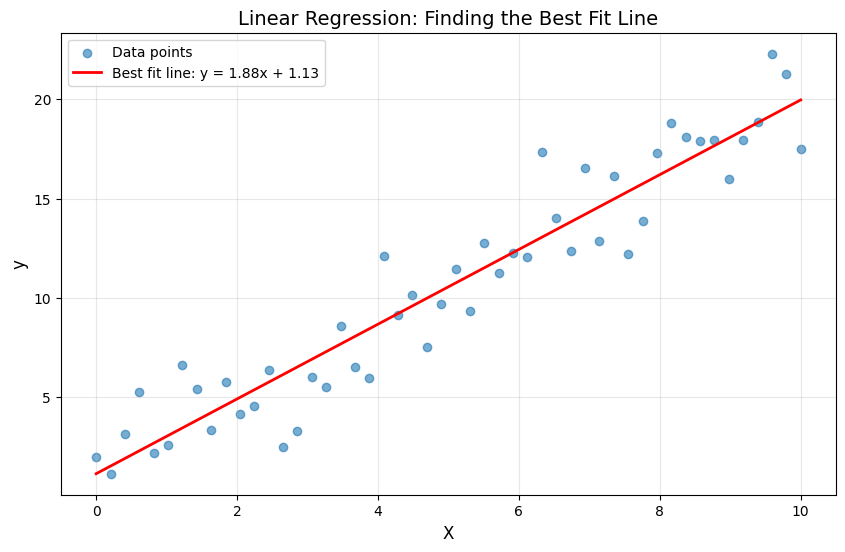

Slope (w1): 1.8840
Intercept (w0): 1.1289


In [1]:
# Let's visualize the concept with a simple example
import numpy as np
import matplotlib.pyplot as plt

# Generate simple data
np.random.seed(42)
X_simple = np.linspace(0, 10, 50)
y_simple = 2 * X_simple + 1 + np.random.randn(50) * 2

# Fit a line
coeffs = np.polyfit(X_simple, y_simple, 1)
y_pred = coeffs[0] * X_simple + coeffs[1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, alpha=0.6, label='Data points')
plt.plot(X_simple, y_pred, 'r-', linewidth=2, label=f'Best fit line: y = {coeffs[0]:.2f}x + {coeffs[1]:.2f}')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Linear Regression: Finding the Best Fit Line', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Slope (w1): {coeffs[0]:.4f}")
print(f"Intercept (w0): {coeffs[1]:.4f}")


---

## 3. Assumptions & Requirements

### Critical Assumptions

Linear Regression makes several important assumptions about your data:

#### ✅ 1. **Linearity**
- **Assumption**: Relationship between X and y is linear
- **Test**: 
  - Scatter plots of features vs target
  - Residual plots (should show no pattern)
- **Fix**: 
  - Add polynomial features
  - Transform variables (log, sqrt)
  - Use non-linear models

#### ✅ 2. **Independence**
- **Assumption**: Observations are independent of each other
- **Test**: 
  - Durbin-Watson test (values near 2 indicate independence)
  - Plot residuals over time
- **Fix**: 
  - Use time series methods
  - Add lag features
  - Account for correlation structure

#### ✅ 3. **Homoscedasticity** (Constant Variance)
- **Assumption**: Variance of errors is constant across all levels of X
- **Test**: 
  - Residual plot (should show equal spread)
  - Breusch-Pagan test
- **Fix**: 
  - Transform target variable (log, sqrt)
  - Use weighted regression
  - Use robust standard errors

#### ✅ 4. **Normality of Errors**
- **Assumption**: Residuals are normally distributed
- **Test**: 
  - Q-Q plot
  - Shapiro-Wilk test
  - Histogram of residuals
- **Fix**: 
  - Transform variables
  - Remove outliers
  - Use robust regression methods

#### ✅ 5. **No Multicollinearity**
- **Assumption**: Features are not highly correlated with each other
- **Test**: 
  - Correlation matrix
  - Variance Inflation Factor (VIF > 5-10 indicates problem)
- **Fix**: 
  - Remove correlated features
  - Use Ridge or Lasso regression
  - Principal Component Analysis (PCA)

### Data Requirements

- **Minimum samples**: ~10-20 per feature (rule of thumb)
- **Target variable**: Continuous (not categorical)
- **Features**: Can be continuous or categorical (after encoding)
- **Missing values**: Must be handled (imputation or removal)
- **Outliers**: Can significantly affect results (consider removal or robust methods)


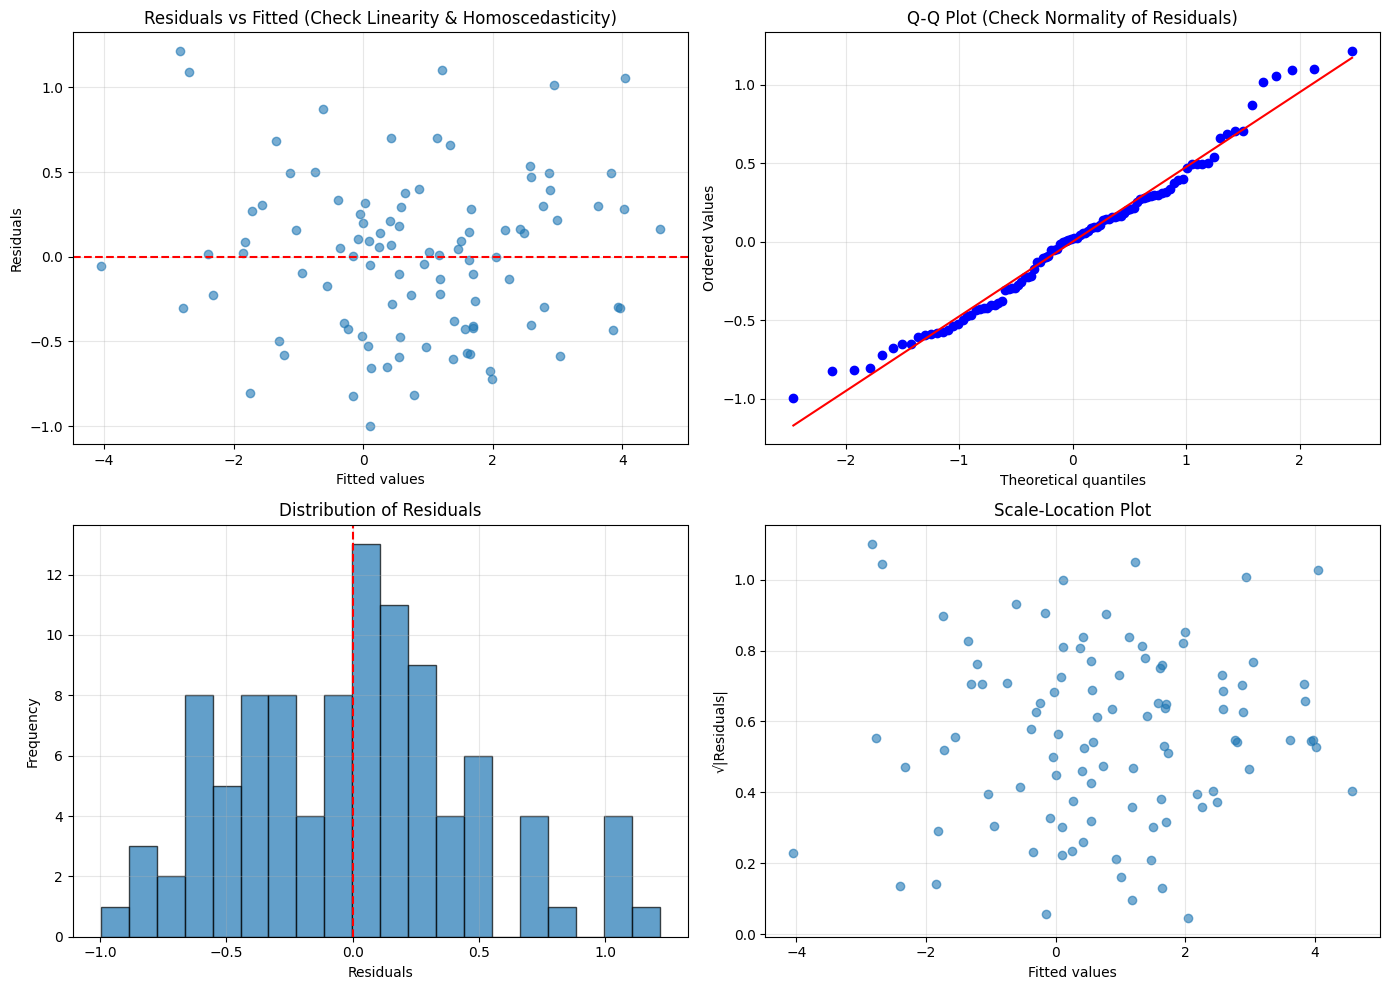

✅ Good signs:
- Residuals randomly scattered around 0
- Q-Q plot points follow the line closely
- Residuals approximately normal distribution
- Equal spread in scale-location plot


In [2]:
# Example: Checking assumptions with visualizations
from scipy import stats

# Generate data with some issues
np.random.seed(42)
X_check = np.random.randn(100, 1)
y_check = 2 * X_check.flatten() + 1 + np.random.randn(100) * 0.5

# Fit model
from sklearn.linear_model import LinearRegression
model_check = LinearRegression()
model_check.fit(X_check, y_check)
y_pred_check = model_check.predict(X_check)
residuals = y_check - y_pred_check

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Residuals vs Fitted
axes[0, 0].scatter(y_pred_check, residuals, alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted (Check Linearity & Homoscedasticity)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Q-Q Plot (Normality)
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Check Normality of Residuals)')
axes[0, 1].grid(True, alpha=0.3)

# 3. Histogram of Residuals
axes[1, 0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scale-Location plot
axes[1, 1].scatter(y_pred_check, np.sqrt(np.abs(residuals)), alpha=0.6)
axes[1, 1].set_xlabel('Fitted values')
axes[1, 1].set_ylabel('√|Residuals|')
axes[1, 1].set_title('Scale-Location Plot')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Good signs:")
print("- Residuals randomly scattered around 0")
print("- Q-Q plot points follow the line closely")
print("- Residuals approximately normal distribution")
print("- Equal spread in scale-location plot")


---

## 4. When to Use This Algorithm

### ✅ Use Linear Regression When:

1. **Linear Relationships Exist**
   - Features have a linear relationship with the target
   - You've validated this with scatter plots

2. **Interpretability is Important**
   - Need to explain predictions to stakeholders
   - Want to understand feature importance
   - Regulatory requirements (medical, financial)

3. **Baseline Model**
   - Starting point before trying complex models
   - Quick prototyping
   - Benchmarking other algorithms

4. **Small to Medium Datasets**
   - Works well with limited data
   - Fewer samples than complex models need

5. **Continuous Target Variable**
   - Predicting prices, temperatures, distances
   - Any numeric value without fixed boundaries

### ❌ Avoid Linear Regression When:

1. **Non-linear Relationships**
   - Data shows curves, exponentials, or complex patterns
   - Scatter plots reveal non-linearity
   - **Alternative**: Polynomial regression, decision trees, neural networks

2. **Categorical Target**
   - Predicting classes or categories
   - **Alternative**: Logistic regression, classification algorithms

3. **Many Correlated Features**
   - High multicollinearity present
   - **Alternative**: Ridge or Lasso regression, PCA first

4. **Assumptions Heavily Violated**
   - Non-constant variance
   - Non-normal residuals
   - **Alternative**: Robust regression, tree-based models

5. **Very Large Datasets**
   - Millions of samples
   - Normal equation becomes slow
   - **Alternative**: Stochastic Gradient Descent, online learning

### Real-world Applications

#### 📈 Economics & Finance
- Stock price prediction
- GDP forecasting
- Risk assessment

#### 🏠 Real Estate
- House price prediction
- Rent estimation
- Property valuation

#### 📊 Business
- Sales forecasting
- Revenue prediction
- Customer lifetime value

#### 🔬 Science
- Experiment result analysis
- Relationship studies
- Calibration curves

#### 🌡️ Other
- Temperature forecasting
- Energy consumption prediction
- Medical dosage calculations


---

## 5. Implementation from Scratch (NumPy)

### Why Implement from Scratch?

1. **Deep Understanding**: See exactly how the algorithm works
2. **Interview Prep**: Common technical interview question
3. **Customization**: Modify for specific needs
4. **Educational Value**: Bridge theory and practice

Let's implement Linear Regression using only NumPy, with both Normal Equation and Gradient Descent methods.


LINEAR REGRESSION FROM SCRATCH

Learned Coefficients:
  True weights:    [ 2.5 -1.5  3. ]
  Learned weights: [ 2.46116836 -1.52498178  2.94620334]

Intercept:
  True intercept:    1.0000
  Learned intercept: 1.0564

Performance:
  Training R² Score: 0.9889
  Test R² Score:     0.9819


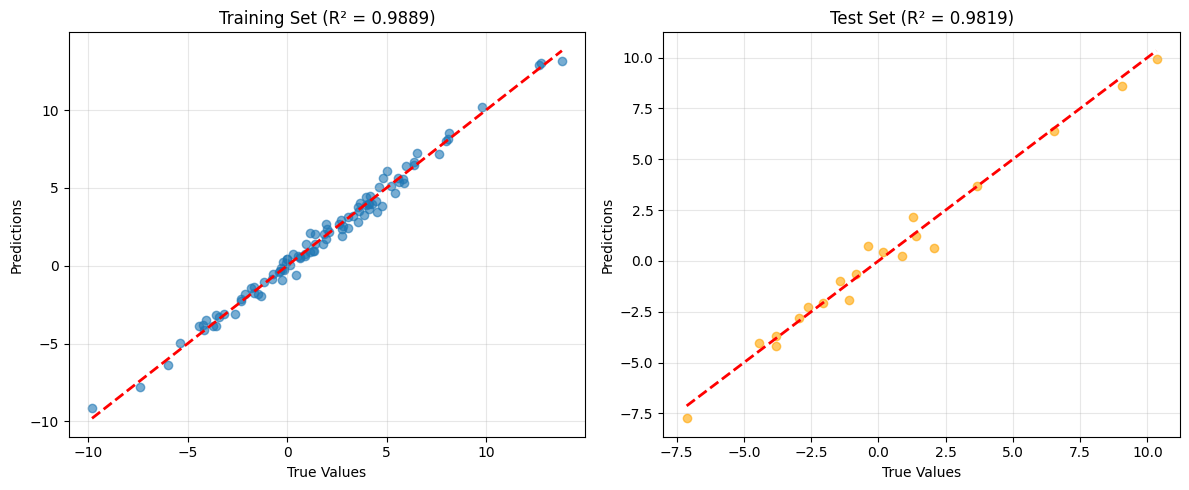

In [3]:
# Import from our src package
import sys
sys.path.append('..')  # Go up one directory to access src

from src.models.linear_models import LinearRegressionScratch, RidgeRegressionScratch, LassoRegressionScratch

# Generate sample data
np.random.seed(42)
X_train = np.random.randn(100, 3)
true_weights = np.array([2.5, -1.5, 3.0])
true_intercept = 1.0
y_train = X_train @ true_weights + true_intercept + np.random.randn(100) * 0.5

X_test = np.random.randn(20, 3)
y_test = X_test @ true_weights + true_intercept + np.random.randn(20) * 0.5

print("=" * 60)
print("LINEAR REGRESSION FROM SCRATCH")
print("=" * 60)

# Train our from-scratch model
model_scratch = LinearRegressionScratch(fit_intercept=True)
model_scratch.fit(X_train, y_train)

# Make predictions
y_pred_train = model_scratch.predict(X_train)
y_pred_test = model_scratch.predict(X_test)

# Evaluate
train_score = model_scratch.score(X_train, y_train)
test_score = model_scratch.score(X_test, y_test)

print(f"\nLearned Coefficients:")
print(f"  True weights:    {true_weights}")
print(f"  Learned weights: {model_scratch.coef_}")
print(f"\nIntercept:")
print(f"  True intercept:    {true_intercept:.4f}")
print(f"  Learned intercept: {model_scratch.intercept_:.4f}")
print(f"\nPerformance:")
print(f"  Training R² Score: {train_score:.4f}")
print(f"  Test R² Score:     {test_score:.4f}")

# Visualize predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Training Set (R² = {train_score:.4f})')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Test Set (R² = {test_score:.4f})')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Testing Ridge and Lasso Regression


In [4]:
# Test Ridge Regression
print("\n" + "=" * 60)
print("RIDGE REGRESSION (L2 Regularization)")
print("=" * 60)

model_ridge = RidgeRegressionScratch(alpha=1.0)
model_ridge.fit(X_train, y_train)
ridge_train_score = model_ridge.score(X_train, y_train)
ridge_test_score = model_ridge.score(X_test, y_test)

print(f"\nRidge Coefficients: {model_ridge.coef_}")
print(f"Ridge Intercept: {model_ridge.intercept_:.4f}")
print(f"Training R² Score: {ridge_train_score:.4f}")
print(f"Test R² Score:     {ridge_test_score:.4f}")

# Test Lasso Regression
print("\n" + "=" * 60)
print("LASSO REGRESSION (L1 Regularization)")
print("=" * 60)

model_lasso = LassoRegressionScratch(alpha=0.1, max_iter=1000)
model_lasso.fit(X_train, y_train)
lasso_train_score = model_lasso.score(X_train, y_train)
lasso_test_score = model_lasso.score(X_test, y_test)

print(f"\nLasso Coefficients: {model_lasso.coef_}")
print(f"Lasso Intercept: {model_lasso.intercept_:.4f}")
print(f"Training R² Score: {lasso_train_score:.4f}")
print(f"Test R² Score:     {lasso_test_score:.4f}")

# Compare coefficients
print("\n" + "=" * 60)
print("COEFFICIENT COMPARISON")
print("=" * 60)
print(f"True weights:   {true_weights}")
print(f"Linear Reg:     {model_scratch.coef_}")
print(f"Ridge Reg:      {model_ridge.coef_}")
print(f"Lasso Reg:      {model_lasso.coef_}")
print("\nNote: Ridge and Lasso shrink coefficients, Lasso can set some to exactly 0 (feature selection)")



RIDGE REGRESSION (L2 Regularization)

Ridge Coefficients: [ 2.42156089 -1.51433367  2.92000573]
Ridge Intercept: 1.0640
Training R² Score: 0.9888
Test R² Score:     0.9822

LASSO REGRESSION (L1 Regularization)

Lasso Coefficients: [ 2.30366012 -1.43819235  2.86000889]
Lasso Intercept: 1.0932
Training R² Score: 0.9869
Test R² Score:     0.9805

COEFFICIENT COMPARISON
True weights:   [ 2.5 -1.5  3. ]
Linear Reg:     [ 2.46116836 -1.52498178  2.94620334]
Ridge Reg:      [ 2.42156089 -1.51433367  2.92000573]
Lasso Reg:      [ 2.30366012 -1.43819235  2.86000889]

Note: Ridge and Lasso shrink coefficients, Lasso can set some to exactly 0 (feature selection)


---

## 6. Implementation with Scikit-learn

Now let's use the industry-standard scikit-learn library, which provides optimized implementations with many additional features.


In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import make_regression

# Generate a more realistic dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=7, 
                       noise=10, random_state=42)

# Split data
X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("=" * 60)
print("SCIKIT-LEARN LINEAR REGRESSION")
print("=" * 60)
print(f"Training samples: {X_train_sk.shape[0]}")
print(f"Test samples: {X_test_sk.shape[0]}")
print(f"Features: {X_train_sk.shape[1]}")

# Train model
sk_model = LinearRegression()
sk_model.fit(X_train_sk, y_train_sk)

# Make predictions
y_train_pred = sk_model.predict(X_train_sk)
y_test_pred = sk_model.predict(X_test_sk)

# Calculate metrics
print(f"\n📊 Training Metrics:")
print(f"  R² Score: {r2_score(y_train_sk, y_train_pred):.4f}")
print(f"  MSE: {mean_squared_error(y_train_sk, y_train_pred):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_sk, y_train_pred)):.2f}")
print(f"  MAE: {mean_absolute_error(y_train_sk, y_train_pred):.2f}")

print(f"\n📊 Test Metrics:")
print(f"  R² Score: {r2_score(y_test_sk, y_test_pred):.4f}")
print(f"  MSE: {mean_squared_error(y_test_sk, y_test_pred):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_sk, y_test_pred)):.2f}")
print(f"  MAE: {mean_absolute_error(y_test_sk, y_test_pred):.2f}")

print(f"\n🔍 Model Parameters:")
print(f"  Intercept: {sk_model.intercept_:.4f}")
print(f"  Coefficients shape: {sk_model.coef_.shape}")
print(f"  Top 3 coefficients: {np.sort(np.abs(sk_model.coef_))[-3:]}")


SCIKIT-LEARN LINEAR REGRESSION
Training samples: 800
Test samples: 200
Features: 10

📊 Training Metrics:
  R² Score: 0.9842
  MSE: 95.25
  RMSE: 9.76
  MAE: 7.72

📊 Test Metrics:
  R² Score: 0.9824
  MSE: 103.15
  RMSE: 10.16
  MAE: 8.32

🔍 Model Parameters:
  Intercept: -0.4925
  Coefficients shape: (10,)
  Top 3 coefficients: [32.41342289 33.53024943 58.65824305]


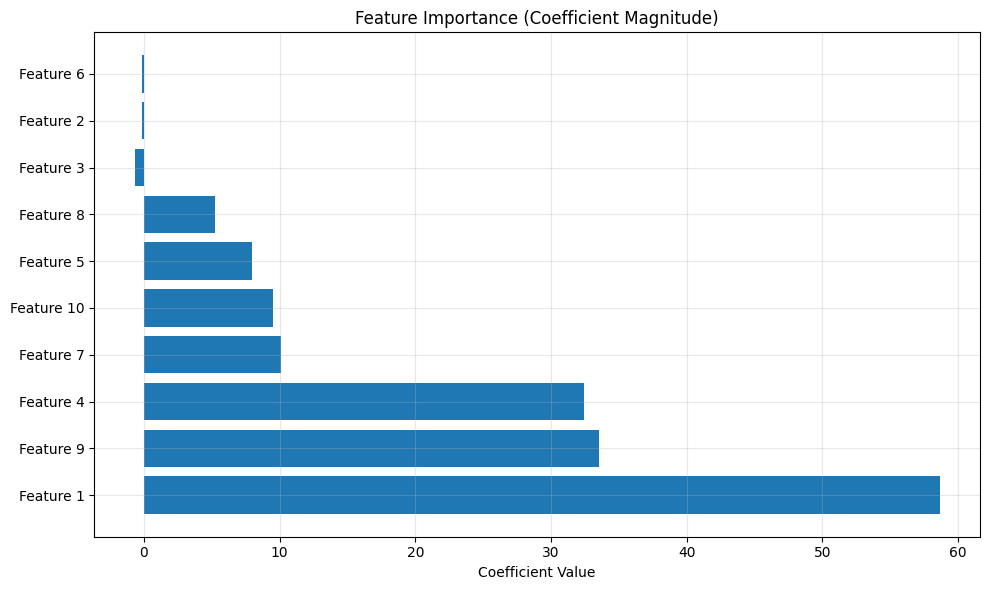

Top 5 Most Important Features:
      Feature  Coefficient  Abs_Coefficient
0   Feature 1    58.658243        58.658243
8   Feature 9    33.530249        33.530249
3   Feature 4    32.413423        32.413423
6   Feature 7    10.115158        10.115158
9  Feature 10     9.541011         9.541011


In [6]:
# Feature Importance Visualization
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(len(sk_model.coef_))],
    'Coefficient': sk_model.coef_,
    'Abs_Coefficient': np.abs(sk_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Coefficient Magnitude)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 5 Most Important Features:")
print(feature_importance.head())


---

## 7. Hyperparameter Tuning

For basic Linear Regression, there aren't many hyperparameters to tune. However, **Ridge** and **Lasso** have the `alpha` parameter that controls regularization strength.

### Grid Search for Ridge/Lasso


HYPERPARAMETER TUNING - RIDGE REGRESSION
Fitting 5 folds for each of 7 candidates, totalling 35 fits

✨ Best parameters: {'alpha': 1.0}
✨ Best CV score: 0.9835
✨ Test score: 0.9824


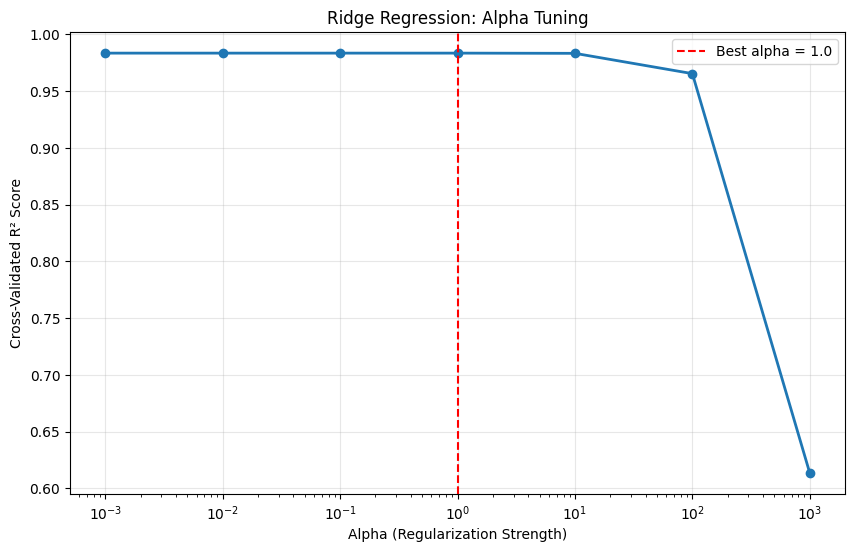

In [7]:
from sklearn.model_selection import GridSearchCV, cross_val_score

print("=" * 60)
print("HYPERPARAMETER TUNING - RIDGE REGRESSION")
print("=" * 60)

# Define parameter grid
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

# Grid search
ridge_model = Ridge()
grid_search_ridge = GridSearchCV(
    estimator=ridge_model,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_ridge.fit(X_train_sk, y_train_sk)

print(f"\n✨ Best parameters: {grid_search_ridge.best_params_}")
print(f"✨ Best CV score: {grid_search_ridge.best_score_:.4f}")
print(f"✨ Test score: {grid_search_ridge.score(X_test_sk, y_test_sk):.4f}")

# Visualize alpha vs score
results_ridge = pd.DataFrame(grid_search_ridge.cv_results_)

plt.figure(figsize=(10, 6))
plt.semilogx(results_ridge['param_alpha'], results_ridge['mean_test_score'], 'o-', linewidth=2)
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validated R² Score')
plt.title('Ridge Regression: Alpha Tuning')
plt.grid(True, alpha=0.3)
plt.axvline(grid_search_ridge.best_params_['alpha'], color='r', linestyle='--', 
            label=f"Best alpha = {grid_search_ridge.best_params_['alpha']}")
plt.legend()
plt.show()


In [8]:
print("\n" + "=" * 60)
print("HYPERPARAMETER TUNING - LASSO REGRESSION")
print("=" * 60)

# Define parameter grid for Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}

# Grid search
lasso_model = Lasso(max_iter=10000)
grid_search_lasso = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid_lasso,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_lasso.fit(X_train_sk, y_train_sk)

print(f"\n✨ Best parameters: {grid_search_lasso.best_params_}")
print(f"✨ Best CV score: {grid_search_lasso.best_score_:.4f}")
print(f"✨ Test score: {grid_search_lasso.score(X_test_sk, y_test_sk):.4f}")

# Check feature selection (how many coefficients are non-zero)
best_lasso = grid_search_lasso.best_estimator_
n_nonzero = np.sum(best_lasso.coef_ != 0)
print(f"\n🔍 Feature Selection:")
print(f"  Total features: {len(best_lasso.coef_)}")
print(f"  Non-zero coefficients: {n_nonzero}")
print(f"  Features removed: {len(best_lasso.coef_) - n_nonzero}")



HYPERPARAMETER TUNING - LASSO REGRESSION
Fitting 5 folds for each of 5 candidates, totalling 25 fits

✨ Best parameters: {'alpha': 0.1}
✨ Best CV score: 0.9835
✨ Test score: 0.9824

🔍 Feature Selection:
  Total features: 10
  Non-zero coefficients: 10
  Features removed: 0


---

## 8. Complete Hyperparameter Reference

### Linear Regression Parameters

#### `fit_intercept` (bool, default=True)
- **Description**: Whether to calculate the intercept
- **Effect**: If False, assumes data is centered at origin
- **When to use**: 
  - Set to False if you've already centered your data
  - Keep True in most cases
- **Example**: `LinearRegression(fit_intercept=False)`

#### `normalize` (deprecated)
- Use `StandardScaler` or preprocessing instead

#### `n_jobs` (int, default=None)
- **Description**: Number of CPUs to use for computation
- **Effect**: Parallel processing for speedup
- **Options**: None (1 CPU), -1 (all CPUs), or specific number
- **Example**: `LinearRegression(n_jobs=-1)`

---

### Ridge Regression Parameters

#### `alpha` (float, default=1.0) **[MOST IMPORTANT]**
- **Description**: Regularization strength (L2 penalty)
- **Effect on Model**:
  - **Higher alpha** (e.g., 10, 100): Stronger regularization
    - Reduces overfitting
    - Shrinks coefficients more
    - Simpler model, potentially underfits
  - **Lower alpha** (e.g., 0.01, 0.1): Weaker regularization
    - Closer to standard Linear Regression
    - May overfit
- **Typical Range**: [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
- **Tuning Strategy**:
  1. Start with alpha=1.0
  2. Try logarithmic scale: 0.001, 0.01, 0.1, 1, 10, 100
  3. Use GridSearchCV with cross-validation
  4. Pick alpha that maximizes validation score
- **Example**: `Ridge(alpha=10.0)`

#### `solver` (str, default='auto')
- **Options**: 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'
- **When to change**:
  - 'svd': Most stable, default for dense data
  - 'lsqr': Good for large sparse datasets
  - 'sag'/'saga': Fast for very large datasets
- **Example**: `Ridge(alpha=1.0, solver='lsqr')`

---

### Lasso Regression Parameters

#### `alpha` (float, default=1.0) **[MOST IMPORTANT]**
- **Description**: Regularization strength (L1 penalty)
- **Effect on Model**:
  - **Feature Selection**: Can set coefficients to exactly 0
  - **Higher alpha**: More features set to 0 (more sparse)
  - **Lower alpha**: More features retained
- **Typical Range**: [0.001, 0.01, 0.1, 1.0, 10.0]
- **Tuning Strategy**:
  1. Start with alpha=1.0
  2. If all features are removed, decrease alpha
  3. If no features removed but want more sparsity, increase alpha
  4. Use LassoCV for automatic alpha selection
- **Example**: `Lasso(alpha=0.1)`

#### `max_iter` (int, default=1000)
- **Description**: Maximum iterations for optimization
- **Effect**: Lasso uses iterative optimization (coordinate descent)
- **When to increase**: If you see convergence warnings
- **Typical Range**: 1000 to 10000
- **Example**: `Lasso(alpha=0.1, max_iter=5000)`

#### `tol` (float, default=1e-4)
- **Description**: Tolerance for stopping criterion
- **Effect**: Lower = more precise (but slower)
- **Example**: `Lasso(alpha=0.1, tol=1e-5)`

#### `selection` (str, default='cyclic')
- **Options**: 'cyclic' or 'random'
- **Effect**: Order of feature updates in coordinate descent
- **When to change**: 'random' can be faster for large datasets
- **Example**: `Lasso(alpha=0.1, selection='random')`

---

### Comparison: Ridge vs Lasso vs Elastic Net

| Aspect | Linear | Ridge (L2) | Lasso (L1) | Elastic Net |
|--------|--------|------------|------------|-------------|
| Regularization | None | \\|\\|w\\|\\|² | \\|\\|w\\|\\|₁ | α₁\\|\\|w\\|\\|₁ + α₂\\|\\|w\\|\\|² |
| Feature Selection | No | No | **Yes** | **Yes** |
| Handles Multicollinearity | No | **Yes** | Somewhat | **Yes** |
| Computational Cost | Low | Low | Medium | Medium |
| When to Use | Simple, interpretable | Correlated features | Want sparse model | Best of both |


---

## 9. Practical Tips & Common Pitfalls

### ✅ Best Practices

#### 1. **Always Check Assumptions First**
```python
# Quick assumption check
def check_assumptions(X, y, model):
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # 1. Linearity (residuals should have no pattern)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r')
    plt.title('Residual Plot')
    
    # 2. Normality (residuals should be normal)
    stats.probplot(residuals, plot=plt)
    plt.show()
    
    # 3. Homoscedasticity (constant variance)
    # Visual check from residual plot
```

#### 2. **Feature Scaling**
- Linear Regression doesn't require scaling
- **BUT**: Ridge/Lasso are sensitive to scale
- **Solution**: Always use `StandardScaler` for Ridge/Lasso

```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
```

#### 3. **Handle Missing Values**
```python
# Option 1: Remove rows
df = df.dropna()

# Option 2: Impute (better)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
```

#### 4. **Use Cross-Validation**
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"CV Scores: {scores.mean():.3f} (+/- {scores.std():.3f})")
```

#### 5. **Check for Multicollinearity**
```python
# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Feature"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])]
    return vif

# VIF > 5-10 indicates multicollinearity
```

---

### ❌ Common Mistakes

#### 1. **Not Splitting Data Properly**
**Bad**:
```python
# Training and testing on same data!
model.fit(X, y)
score = model.score(X, y)  # Overly optimistic!
```

**Good**:
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)  # Honest evaluation
```

#### 2. **Ignoring Outliers**
- Outliers can massively skew results
- **Solution**: 
  - Identify with z-scores or IQR
  - Remove or use robust regression

#### 3. **Using Without Scaling (for Ridge/Lasso)**
**Bad**:
```python
# Feature 1: [1-10], Feature 2: [1000-10000]
model = Ridge(alpha=1.0)
model.fit(X, y)  # Alpha affects features differently!
```

**Good**:
```python
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = Ridge(alpha=1.0)
model.fit(X_scaled, y)  # Now alpha treats all features equally
```

#### 4. **Extrapolation**
- Linear regression is bad at extrapolating beyond training data
- **Solution**: Only predict within range of training data

#### 5. **Assuming Causation**
- Correlation ≠ Causation
- Just because X predicts y doesn't mean X causes y

---

### Performance Optimization

#### Computational Complexity
- **Normal Equation**: O(n³) where n = number of features
- **Gradient Descent**: O(k × n × m) where k = iterations, m = samples
- **Rule**: Use normal equation for <10,000 features, gradient descent otherwise

#### Memory Requirements
- Stores coefficient matrix: O(n) where n = features
- Very memory efficient

#### Scaling to Large Datasets
```python
# For huge datasets, use SGD
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, tol=1e-3)
model.partial_fit(X_batch, y_batch)  # Can train in batches
```

---

### Debugging Tips

#### Model Not Learning? Check:
1. **Learning rate too high/low** (if using gradient descent)
2. **Features not scaled** (Ridge/Lasso)
3. **Data has no linear relationship**
4. **Target variable is categorical** (use classification instead)

#### Poor Test Performance? Check:
1. **Overfitting**: Use Ridge/Lasso
2. **Feature leakage**: Check train/test split
3. **Different distributions**: Train and test data should be similar
4. **Outliers**: May be affecting model


---

## 10. Real-world Example: Predicting House Prices

Let's apply everything we've learned to a realistic problem.


In [9]:
# Load dataset (using California Housing as example)
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

print("=" * 60)
print("REAL-WORLD EXAMPLE: CALIFORNIA HOUSING PRICES")
print("=" * 60)

# Load data
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = housing.target  # Median house value in $100,000s

print(f"\nDataset Shape: {X_housing.shape}")
print(f"Target Range: ${y_housing.min()*100_000:.0f} - ${y_housing.max()*100_000:.0f}")
print(f"\nFeatures:\n{X_housing.columns.tolist()}")

# Display first few rows
print(f"\nFirst 5 rows:")
print(X_housing.head())
print(f"\nTarget (first 5): {y_housing[:5]} (in $100k)")

# Check for missing values
print(f"\nMissing values: {X_housing.isnull().sum().sum()}")


REAL-WORLD EXAMPLE: CALIFORNIA HOUSING PRICES

Dataset Shape: (20640, 8)
Target Range: $14999 - $500001

Features:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

First 5 rows:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (first 5): [4.526 3.585 3.521 3.413 3.422] (in $100k)

Missing values: 0


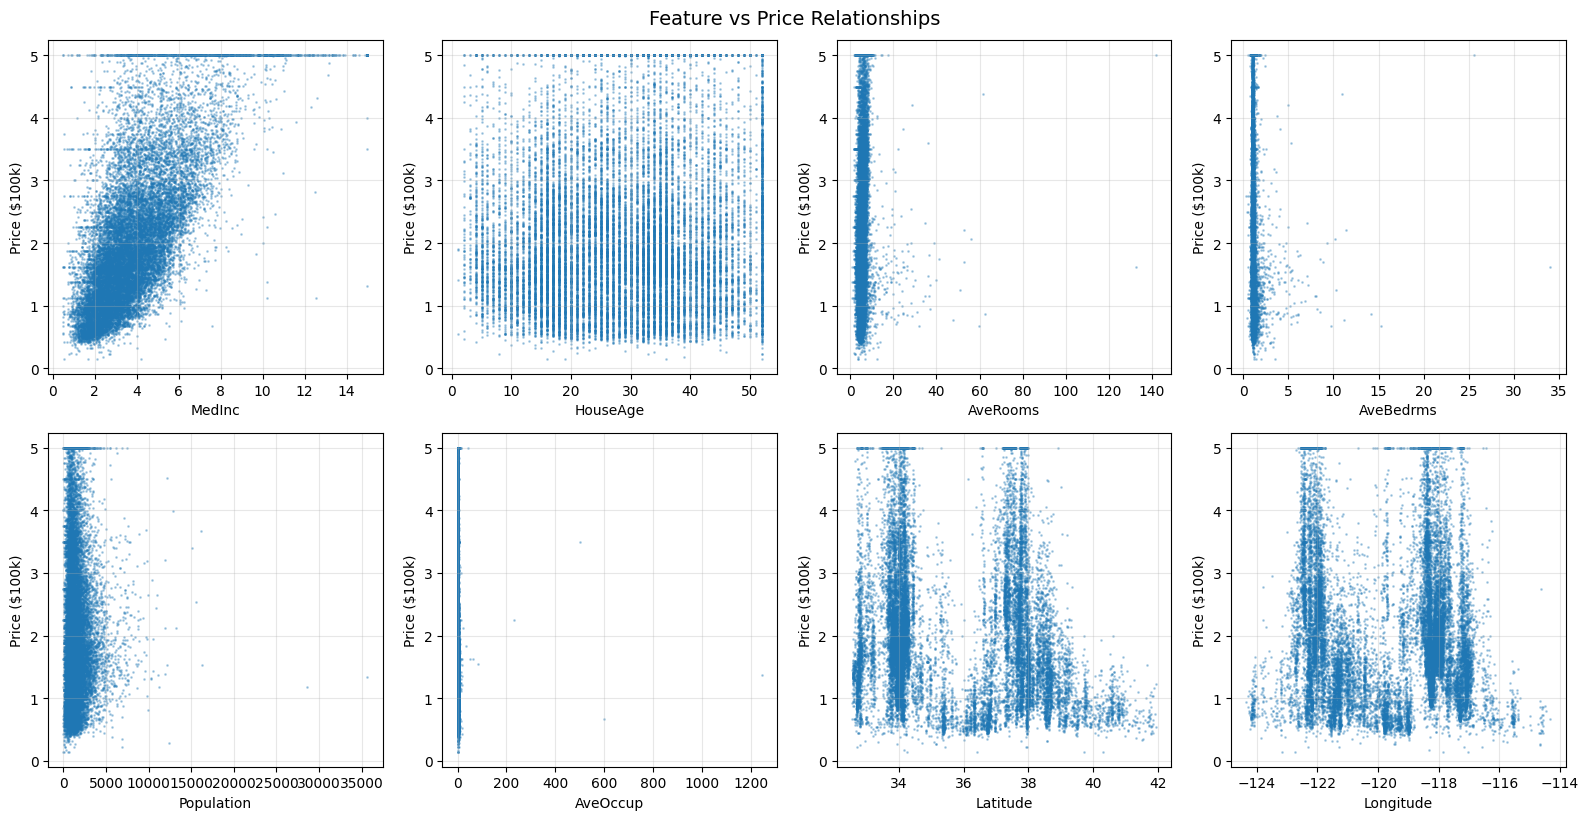

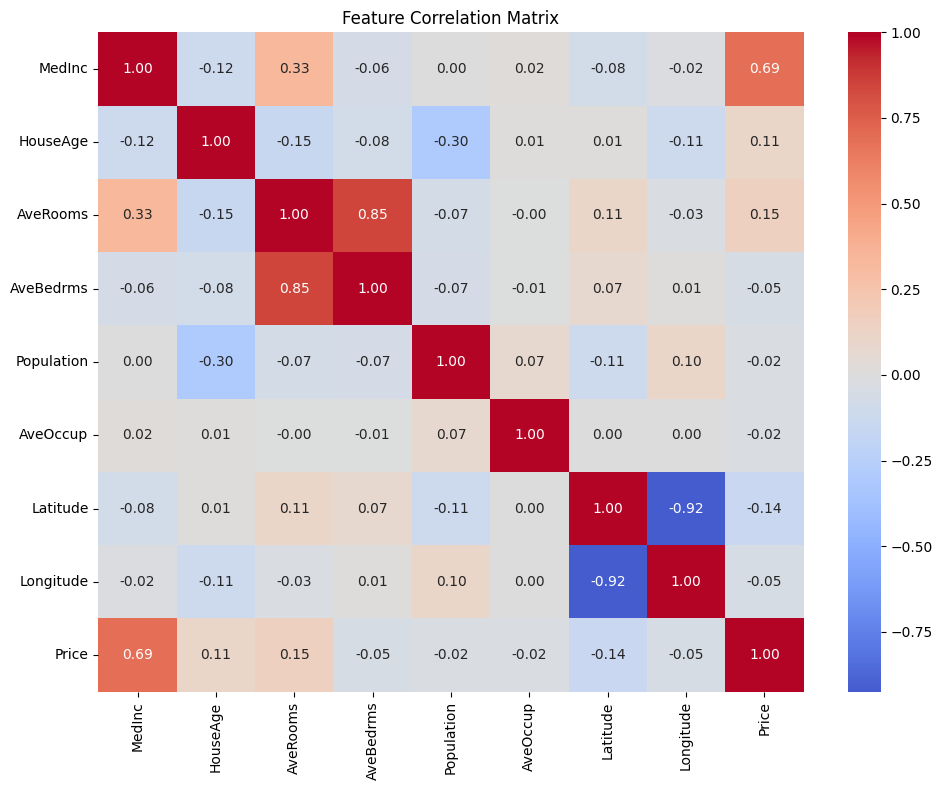

In [10]:
# Exploratory Data Analysis
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(X_housing.columns):
    axes[idx].scatter(X_housing[col], y_housing, alpha=0.3, s=1)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price ($100k)')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature vs Price Relationships', y=1.02, fontsize=14)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X_housing.copy()
correlation_matrix['Price'] = y_housing
sns.heatmap(correlation_matrix.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


In [11]:
# Train-Test Split
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Feature Scaling (important for Ridge/Lasso)
scaler_house = StandardScaler()
X_train_scaled = scaler_house.fit_transform(X_train_house)
X_test_scaled = scaler_house.transform(X_test_house)

print("=" * 60)
print("MODEL COMPARISON")
print("=" * 60)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge (α=1)': Ridge(alpha=1.0),
    'Ridge (α=10)': Ridge(alpha=10.0),
    'Lasso (α=0.1)': Lasso(alpha=0.1, max_iter=10000),
    'Lasso (α=1)': Lasso(alpha=1.0, max_iter=10000)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train_house)
    
    # Predict
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate
    train_r2 = r2_score(y_train_house, y_train_pred)
    test_r2 = r2_score(y_test_house, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_house, y_test_pred))
    
    # Count non-zero coefficients
    n_features = np.sum(model.coef_ != 0) if hasattr(model, 'coef_') else len(X_housing.columns)
    
    results.append({
        'Model': name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Test RMSE': test_rmse,
        'Features Used': n_features
    })
    
    print(f"\n{name}:")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  Test RMSE: ${test_rmse*100_000:.0f}")
    print(f"  Active Features: {n_features}/{len(X_housing.columns)}")

# Create comparison dataframe
results_df = pd.DataFrame(results)
print("\n" + "=" * 60)
print(results_df.to_string(index=False))


MODEL COMPARISON

Linear Regression:
  Train R²: 0.6126
  Test R²:  0.5758
  Test RMSE: $74558
  Active Features: 8/8

Ridge (α=1):
  Train R²: 0.6126
  Test R²:  0.5758
  Test RMSE: $74556
  Active Features: 8/8

Ridge (α=10):
  Train R²: 0.6125
  Test R²:  0.5761
  Test RMSE: $74534
  Active Features: 8/8

Lasso (α=0.1):
  Train R²: 0.4974
  Test R²:  0.4814
  Test RMSE: $82440
  Active Features: 3/8

Lasso (α=1):
  Train R²: 0.0000
  Test R²:  -0.0002
  Test RMSE: $114486
  Active Features: 0/8

            Model  Train R²   Test R²  Test RMSE  Features Used
Linear Regression  0.612551  0.575788   0.745581              8
      Ridge (α=1)  0.612551  0.575816   0.745557              8
     Ridge (α=10)  0.612544  0.576060   0.745342              8
    Lasso (α=0.1)  0.497419  0.481361   0.824396              3
      Lasso (α=1)  0.000000 -0.000219   1.144856              0


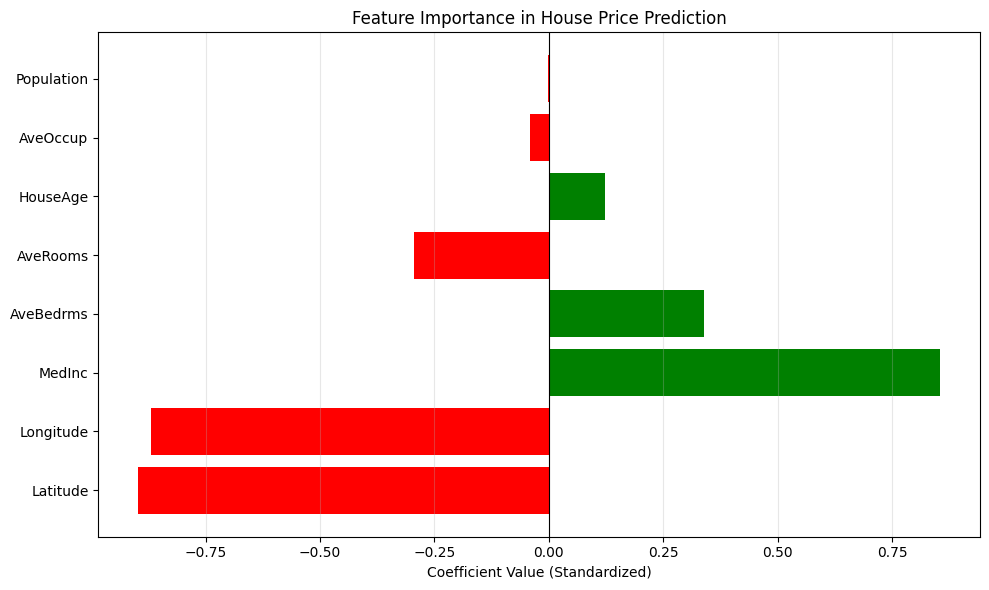


Feature Importance Interpretation:
• Latitude: decreases price (coef: -0.8969)
• Longitude: decreases price (coef: -0.8698)
• MedInc: increases price (coef: 0.8544)
• AveBedrms: increases price (coef: 0.3393)
• AveRooms: decreases price (coef: -0.2944)
• HouseAge: increases price (coef: 0.1225)
• AveOccup: decreases price (coef: -0.0408)
• Population: decreases price (coef: -0.0023)

💡 Business Insights:
- MedInc (Median Income) is the strongest predictor
- Latitude/Longitude matter (location, location, location!)
- Average occupancy negatively affects price (overcrowding)


In [12]:
# Feature importance from best model
best_model = LinearRegression()
best_model.fit(X_train_scaled, y_train_house)

feature_importance_house = pd.DataFrame({
    'Feature': X_housing.columns,
    'Coefficient': best_model.coef_,
    'Abs_Coefficient': np.abs(best_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance_house['Coefficient']]
plt.barh(feature_importance_house['Feature'], feature_importance_house['Coefficient'], color=colors)
plt.xlabel('Coefficient Value (Standardized)')
plt.title('Feature Importance in House Price Prediction')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

print("\nFeature Importance Interpretation:")
print("="*60)
for idx, row in feature_importance_house.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"• {row['Feature']}: {impact} price (coef: {row['Coefficient']:.4f})")

print("\n💡 Business Insights:")
print("- MedInc (Median Income) is the strongest predictor")
print("- Latitude/Longitude matter (location, location, location!)")
print("- Average occupancy negatively affects price (overcrowding)")


---

## 11. Comparison with Other Algorithms

### When to Choose Linear Regression vs Alternatives

| Aspect | Linear Regression | Decision Trees | Random Forest | XGBoost | Neural Networks |
|--------|-------------------|----------------|---------------|---------|-----------------|
| **Interpretability** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐ | ⭐ |
| **Training Speed** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐ |
| **Prediction Speed** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |
| **Accuracy (linear data)** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐ |
| **Accuracy (non-linear)** | ⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Handles Outliers** | ⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐ |
| **Small Data (<1000)** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐ | ⭐ |
| **Feature Engineering** | Required | Optional | Optional | Optional | Optional |
| **Overfitting Risk** | Low | High | Low | Medium | High |

### Practical Comparison Example


In [13]:
# Compare Linear Regression with other algorithms
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import time

print("=" * 60)
print("ALGORITHM COMPARISON ON HOUSING DATA")
print("=" * 60)

algorithms = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
}

comparison_results = []

for name, model in algorithms.items():
    # Time training
    start_time = time.time()
    model.fit(X_train_scaled, y_train_house)
    train_time = time.time() - start_time
    
    # Time prediction
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    pred_time = time.time() - start_time
    
    # Metrics
    test_r2 = r2_score(y_test_house, y_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test_house, y_pred))
    
    comparison_results.append({
        'Algorithm': name,
        'R² Score': test_r2,
        'RMSE ($)': test_rmse * 100_000,
        'Train Time (s)': train_time,
        'Pred Time (ms)': pred_time * 1000
    })

# Display results
comparison_df = pd.DataFrame(comparison_results)
print(comparison_df.to_string(index=False))

print("\n💡 Key Takeaways:")
print("- Linear Regression is fastest to train and predict")
print("- Random Forest/Trees may have better accuracy for non-linear patterns")
print("- Linear Regression is most interpretable (see exact coefficients)")
print("- For this dataset, Linear Regression performs well (data is fairly linear)")


ALGORITHM COMPARISON ON HOUSING DATA
        Algorithm  R² Score     RMSE ($)  Train Time (s)  Pred Time (ms)
Linear Regression  0.575788 74558.138301        0.014751        0.000000
    Decision Tree  0.683269 64424.183036        0.094291        0.000000
    Random Forest  0.773889 54433.282070        1.355069       58.421612

💡 Key Takeaways:
- Linear Regression is fastest to train and predict
- Random Forest/Trees may have better accuracy for non-linear patterns
- Linear Regression is most interpretable (see exact coefficients)
- For this dataset, Linear Regression performs well (data is fairly linear)


---

## 12. References

### 📚 Academic Papers & Books

1. **Original Work**:
   - Galton, F. (1886). "Regression towards mediocrity in hereditary stature"
   - Legendre, A. M. (1805). "Nouvelles méthodes pour la détermination des orbites des comètes"

2. **Modern Textbooks**:
   - Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning*
   - James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning*
   - Murphy, K. P. (2012). *Machine Learning: A Probabilistic Perspective*

3. **Regularization**:
   - Hoerl, A. E., & Kennard, R. W. (1970). "Ridge Regression: Biased Estimation for Nonorthogonal Problems"
   - Tibshirani, R. (1996). "Regression Shrinkage and Selection via the Lasso"

### 🌐 Online Resources

- [Scikit-learn Linear Models Documentation](https://scikit-learn.org/stable/modules/linear_model.html)
- [StatQuest: Linear Regression](https://www.youtube.com/watch?v=nk2CQITm_eo)
- [Andrew Ng's Machine Learning Course](https://www.coursera.org/learn/machine-learning)
- [3Blue1Brown: Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

### 🔗 Related Notebooks in this Repository

- `02_logistic_regression.ipynb` - Classification version
- `03_decision_trees.ipynb` - Non-linear alternative
- `04_random_forest.ipynb` - Ensemble method
- `08_gradient_boosting.ipynb` - Advanced ensemble
- `15_pca.ipynb` - Dimensionality reduction before regression

### 📊 Datasets Used

- California Housing Dataset: `sklearn.datasets.fetch_california_housing()`
- Custom Generated Data: `sklearn.datasets.make_regression()`

---

## Summary & Key Takeaways

### What We Learned

1. **Theory**: Linear regression fits a line/hyperplane to minimize squared errors
2. **Math**: Normal Equation provides closed-form solution
3. **Assumptions**: Linearity, independence, homoscedasticity, normality, no multicollinearity
4. **Implementation**: Built from scratch using NumPy and used scikit-learn
5. **Regularization**: Ridge (L2) and Lasso (L1) prevent overfitting
6. **Tuning**: Alpha controls regularization strength
7. **Practice**: Applied to real house price prediction

### When to Use Linear Regression

✅ **Use when**:
- Linear relationship exists
- Need interpretability
- Want baseline model
- Have small-medium dataset
- Continuous target variable

❌ **Avoid when**:
- Non-linear relationships
- Categorical target
- Many correlated features (use Ridge/Lasso instead)
- Assumptions heavily violated

### Next Steps

1. Practice with your own datasets
2. Try polynomial features for non-linear data
3. Experiment with feature engineering
4. Compare with tree-based models
5. Move on to classification (Logistic Regression)

---

**Congratulations!** You now have a solid understanding of Linear Regression. 🎉
